In [2]:
%pip install scikit-learn
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Import data
import pandas
mainData = pandas.read_csv("../Dataset/final.csv")
mainData.head()

,t,s,c,id,ctx,msg,attr,type,ns,command,...,durationMillis,FindCollectionTarget,filter,tokenized_filter,lsid.id.$uuid,$db,filter_str,text,label,text_with_replacement
0,1.712243e+09,I,COMMAND,51803,conn10,Slow query,"{'type': 'command', 'ns': 'test_database.test_...",command,test_database.test_collection,"{'find': 'test_collection', 'filter': {'user':...",...,0,test_collection,"{'user': '{}', 'password': '{}'}",[],e5e23d7e-5367-4829-a104-ca369c49d4dc,test_database,"{'user': '{}', 'password': '{}'}","{'user': '{}', 'password': '{}'}",0.0,"{'name': '{}', 'name': '{}'}"
1,1.712243e+09,I,COMMAND,51803,conn10,Slow query,"{'type': 'command', 'ns': 'test_database.test_...",command,test_database.test_collection,"{'find': 'test_collection', 'filter': {'user':...",...,0,test_collection,"{'user': '{}', 'password': '{}'}",[],e5e23d7e-5367-4829-a104-ca369c49d4dc,test_database,"{'user': '{}', 'password': '{}'}","{'user': '{}', 'password': '{}'}",0.0,"{'name': '{}', 'name': '{}'}"
2,1.712243e+09,I,COMMAND,51803,conn10,Slow query,"{'type': 'command', 'ns': 'test_database.test_...",command,test_database.test_collection,"{'find': 'test_collection', 'filter': {'userna...",...,0,test_collection,{'username': {'$regex': '^{}'}},[],e5e23d7e-5367-4829-a104-ca369c49d4dc,test_database,{'username': {'$regex': '^{}'}},{'username': {'$regex': '^{}'}},1.0,{'name': {'$regex': '^{}'}}
3,1.712243e+09,I,COMMAND,51803,conn10,Slow query,"{'type': 'command', 'ns': 'test_database.test_...",command,test_database.test_collection,"{'find': 'test_collection', 'filter': {'userna...",...,0,test_collection,{'username': {'$regex': '^{}'}},[],e5e23d7e-5367-4829-a104-ca369c49d4dc,test_database,{'username': {'$regex': '^{}'}},{'username': {'$regex': '^{}'}},1.0,{'name': {'$regex': '^{}'}}
4,1.712243e+09,I,COMMAND,51803,conn10,Slow query,"{'type': 'command', 'ns': 'test_database.test_...",command,test_database.test_collection,"{'find': 'test_collection', 'filter': {'userna...",...,0,test_collection,{'username': {'$ne': '{}'}},[],e5e23d7e-5367-4829-a104-ca369c49d4dc,test_database,{'username': {'$ne': '{}'}},{'username': {'$ne': '{}'}},1.0,{'name': {'$ne': '{}'}}


In [13]:
# preprocess
featureSet = mainData[["t","text","remote","FindCollectionTarget","text_with_replacement"]]
target = mainData[["label"]]
featureSet.head()

,t,text,remote,FindCollectionTarget,text_with_replacement
0,1.712243e+09,"{'user': '{}', 'password': '{}'}",127.0.0.1:47038,test_collection,"{'name': '{}', 'name': '{}'}"
1,1.712243e+09,"{'user': '{}', 'password': '{}'}",127.0.0.1:47038,test_collection,"{'name': '{}', 'name': '{}'}"
2,1.712243e+09,{'username': {'$regex': '^{}'}},127.0.0.1:47038,test_collection,{'name': {'$regex': '^{}'}}
3,1.712243e+09,{'username': {'$regex': '^{}'}},127.0.0.1:47038,test_collection,{'name': {'$regex': '^{}'}}
4,1.712243e+09,{'username': {'$ne': '{}'}},127.0.0.1:47038,test_collection,{'name': {'$ne': '{}'}}


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(featureSet, target, test_size=0.2)
vectorizer = TfidfVectorizer()
X_train_text_vectorized = vectorizer.fit_transform(X_train["text_with_replacement"])
X_test_text_vectorized = vectorizer.transform(X_test["text_with_replacement"])

X_train_gentext_vectorized = vectorizer.fit_transform(X_train["text"])
X_test_gentext_vectorized = vectorizer.transform(X_test["text"])

X_train_ColTarger_vectorized = vectorizer.transform(X_train["FindCollectionTarget"])
X_test_ColTarger_vectorized = vectorizer.transform(X_test["FindCollectionTarget"])
 
X_train_ip_vectorized = vectorizer.transform(X_train["remote"])
X_test_ip_vectorized = vectorizer.transform(X_test["remote"])

# Extract other features
other_features_train = X_train[['t']].values
other_features_test = X_test[['t']].values

# Concatenate all features
X_train_concatenated = hstack((X_train_text_vectorized, X_train_ColTarger_vectorized,X_train_ip_vectorized, other_features_train))
X_test_concatenated = hstack((X_test_text_vectorized, X_test_ColTarger_vectorized,X_test_ip_vectorized, other_features_test))




In [4]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Logistic Regression
logistic_regression_model = LogisticRegression(verbose=1)
logistic_regression_model.fit(X_train_concatenated, y_train)

# Random Forest
random_forest_model = RandomForestClassifier(verbose=1)
random_forest_model.fit(X_train_concatenated, y_train)

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(verbose=1)
gradient_boosting_model.fit(X_train_concatenated, y_train)

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          344     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32391D+02    |proj g|=  1.28418D+10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  344      3     10      1     0     0   4.075D+03   1.318D+02
  F =   131.80149929521247     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
      Iter       Train Loss   Remaining Time 
         1           1.3216            0.12s
         2           1.2733            0.10s
         3           1.2327            0.09s
         4   

GradientBoostingClassifier(verbose=1)

In [7]:
from sklearn.model_selection import GridSearchCV
svm_params = {'C': [0.1, 1, 10]}  # Example values, adjust as needed
svm_grid = GridSearchCV(SVC(kernel='linear', verbose=1, probability=False), svm_params, cv=5)
svm_grid.fit(X_train_concatenated, y_train)

print("Best SVM Parameters:", svm_grid.best_params_)
svm_best_model = svm_grid.best_estimator_
svm_pred_train = svm_best_model.predict(X_train_concatenated)

[LibSVM]................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


models = {
    #"SVM": svm_best_model,
    "Logistic Regression": logistic_regression_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model
}
accuracies = {}
for name, model in models.items():
    y_pred = model.predict(X_test_concatenated)
    f1 = f1_score(y_test, y_pred)
    accuracies[name] = f1
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:")
    print(report)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        24
         1.0       0.00      0.00      0.00        24

    accuracy                           0.50        48
   macro avg       0.25      0.50      0.33        48
weighted avg       0.25      0.50      0.33        48

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        24
         1.0       0.87      0.83      0.85        24

    accuracy                           0.85        48
   macro avg       0.85      0.85      0.85        48
weighted avg       0.85      0.85      0.85        48

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81        24
         1.0       0.80      0.83      0.82        24

    accuracy                           0.81      

/home/shaunakperni/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shaunakperni/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shaunakperni/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)

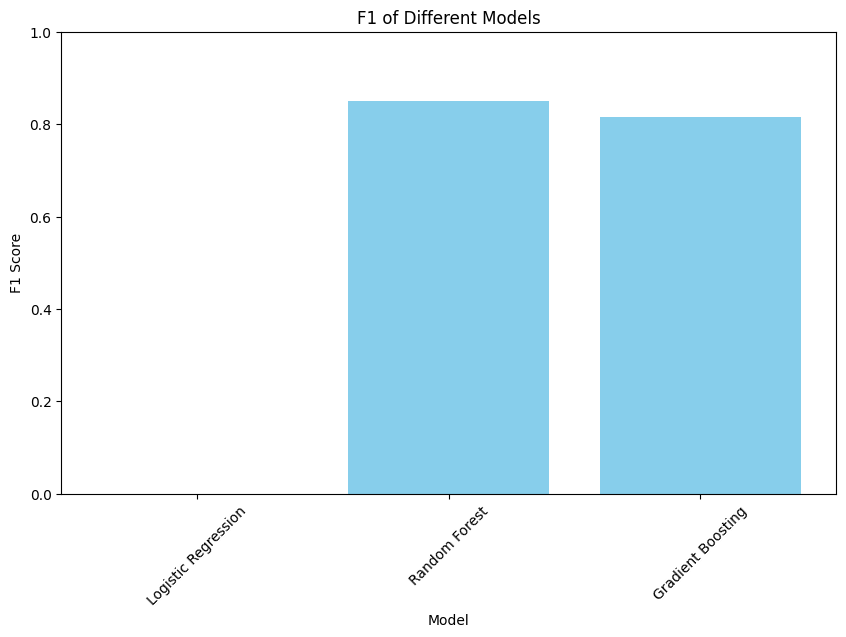

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

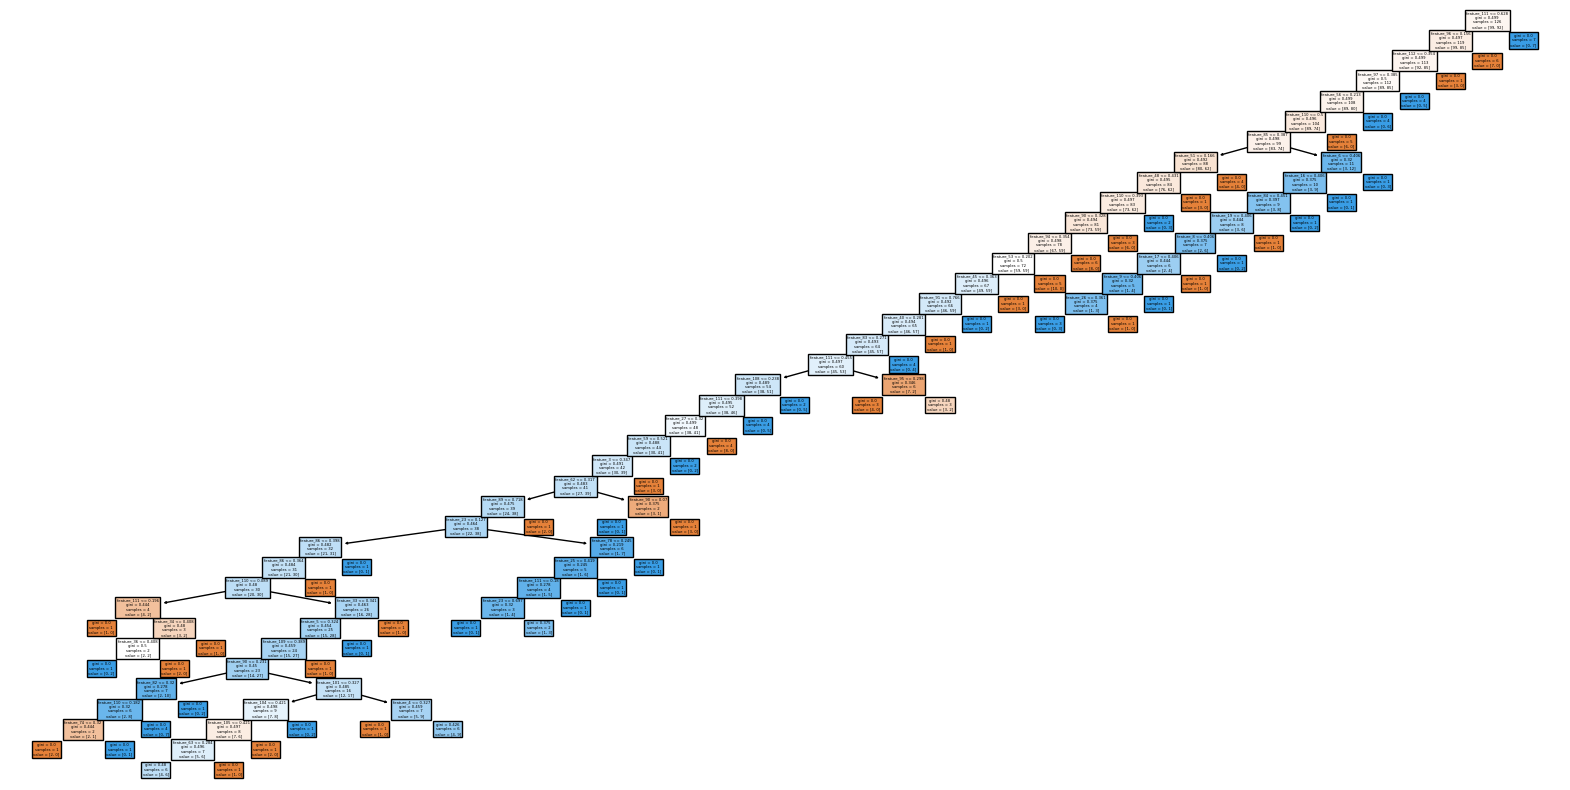

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(random_forest_model.estimators_[0], filled=True, feature_names=[f'feature_{i}' for i in range(X_train_concatenated.shape[1])])
plt.show()

In [16]:
svm_singular  = SVC(kernel='linear')
svm_singular.fit(X_train_gentext_vectorized,y_train)
y_pred = svm_singular.predict(X_test_gentext_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6875


/home/shaunakperni/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
svm_singular  = SVC(kernel='linear')
svm_singular.fit(X_train_text_vectorized,y_train)
y_pred = svm_singular.predict(X_test_text_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6458333333333334


/home/shaunakperni/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
